In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [16]:
churn = pd.read_csv('D:\Downloads\customer_churn_2.csv')
churn.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


Data Exploration

In [18]:
churn.shape

(100000, 9)

In [19]:
churn.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [22]:
churn.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [23]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


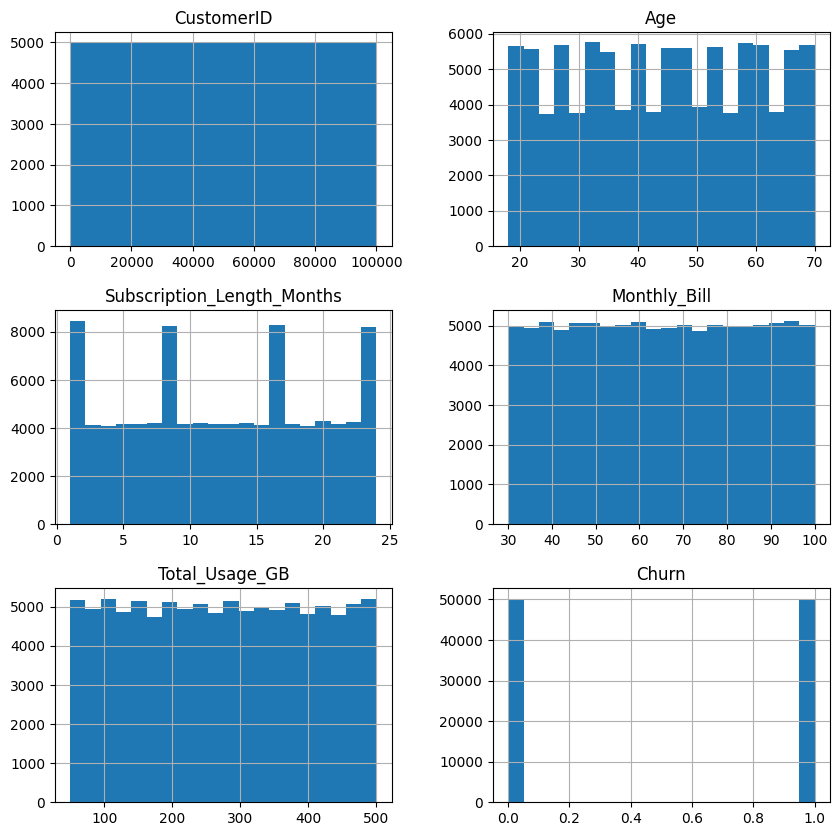

In [24]:
churn.hist(bins=20, figsize=(10,10))
plt.show()

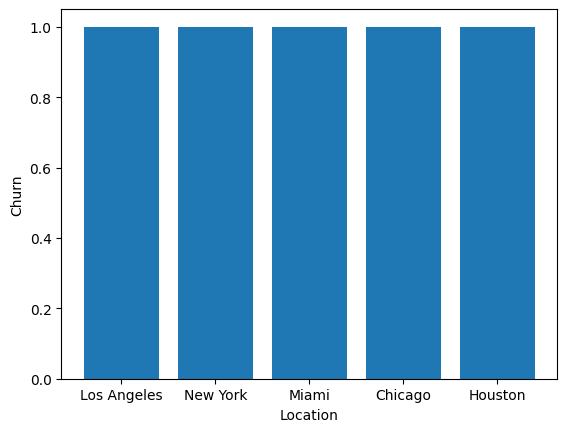

In [32]:
plt.bar(churn['Churn'], churn['Location'])
plt.xlabel('Churn')
plt.ylabel('Location')
plt.show()

No Missing Data Found

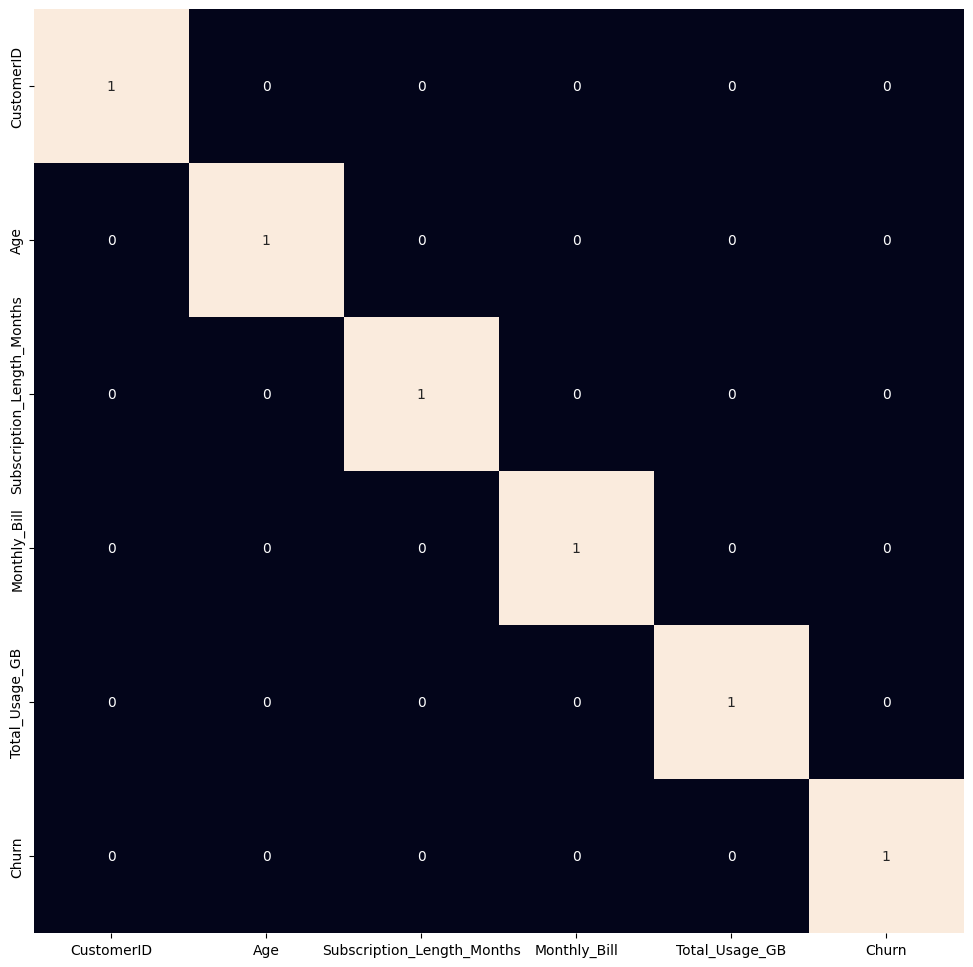

In [29]:
plt.figure(figsize=(12, 12))
sns.heatmap(churn.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [52]:
churn.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,0,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,1,New York,1,48.76,172,0
2,3,Customer_3,24,1,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,1,Miami,3,97.94,297,1
4,5,Customer_5,46,1,Miami,19,58.14,266,0


Preparing the data for machine learning

Generating Relevant Features from the dataset

In [58]:
features = churn.drop(['Name','Gender','Location','Churn'], axis=1)
target = churn['Churn']

xtrain,xtest,ytrain,ytest = train_test_split(features, target, test_size=0.2, random_state=40)
xtrain.shape, xtest.shape

((80000, 6), (20000, 6))

Applying Normalization

In [59]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

Applying machine learning algorithms and training and validating the selected model on training dataset 

In [60]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain, ytrain)
    
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0



Evaluating model's performance

In [62]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9975
           1       1.00      1.00      1.00     10025

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

